In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Train.csv')
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [5]:
df = df.drop(['id','thumbnail_url','zipcode','instant_bookable','host_response_rate','name','description','first_review','last_review'],axis=1)

In [6]:
review_scores_rating_avg = df.review_scores_rating.mean()
df.review_scores_rating = df.review_scores_rating.fillna(review_scores_rating_avg)

In [7]:
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['host_since'].fillna(df['host_since'].mode()[0], inplace=True)

In [8]:
df = df.dropna()

In [9]:
#df[df.log_price == 0] = df.log_price.mean()

In [10]:
df['bathrooms'] = df.bathrooms.astype('int')
df['accommodates'] = df.accommodates.astype('int')
df['review_scores_rating'] = df.review_scores_rating.astype('int')
df['bedrooms'] = df.bedrooms.astype('int')
df['beds'] = df.beds.astype('int')

In [11]:
df.loc[df.room_type == 4.782069108304868]
df = df.drop(index=11632)

In [12]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [13]:
df.groupby('city')[['log_price']].sum()

log_price
city                  
Boston    16890.638184
Chicago   14139.404268
DC        24369.849639
LA        80861.690631
NYC      151819.353578
SF        33112.714737

In [14]:
df.review_scores_rating = df.review_scores_rating.apply(lambda x: str(x)+'%')

In [15]:
rat_value = df.review_scores_rating.value_counts().sort_values(ascending=False).head(10)

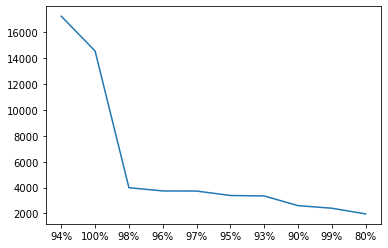

In [16]:
plt.plot(rat_value)

In [17]:
df.city.value_counts()

NYC        32164
LA         16960
SF          6402
DC          4875
Boston      3458
Chicago     3059
Name: city, dtype: int64

In [18]:
df.property_type.value_counts()

Apartment             45571
House                 13756
Condominium            2392
Townhouse              1489
Loft                   1148
Other                   541
Guesthouse              437
Bed & Breakfast         398
Bungalow                310
Guest suite             120
Dorm                    119
Villa                   109
Timeshare                77
In-law                   71
Boutique hotel           69
Hostel                   63
Camper/RV                58
Cabin                    56
Boat                     50
Serviced apartment       19
Castle                   12
Tent                     11
Vacation home            10
Yurt                      7
Treehouse                 6
Chalet                    5
Hut                       4
Earth House               3
Tipi                      3
Cave                      2
Train                     1
Casa particular           1
Name: property_type, dtype: int64

In [19]:
df.groupby('accommodates')[['log_price']].count()


log_price
accommodates           
1                  8515
2                 28845
3                  7039
4                 10972
5                  3096
6                  4464
7                   852
8                  1592
9                   237
10                  601
11                   68
12                  228
13                   33
14                   87
15                   49
16                  240

In [20]:
xx = df.loc[:,['property_type','log_price']]
xx

property_type  log_price
0         Apartment   5.010635
1         Apartment   5.129899
2         Apartment   4.976734
3             House   6.620073
4         Apartment   4.744932
...             ...        ...
74106     Apartment   4.605170
74107     Apartment   5.043425
74108     Apartment   5.220356
74109     Apartment   5.273000
74110          Boat   4.852030

[66918 rows x 2 columns]

In [21]:
x = df.loc[:,['city','log_price']]
x

city  log_price
0      NYC   5.010635
1      NYC   5.129899
2      NYC   4.976734
3       SF   6.620073
4       DC   4.744932
...    ...        ...
74106  NYC   4.605170
74107   LA   5.043425
74108  NYC   5.220356
74109  NYC   5.273000
74110   LA   4.852030

[66918 rows x 2 columns]

<AxesSubplot:>

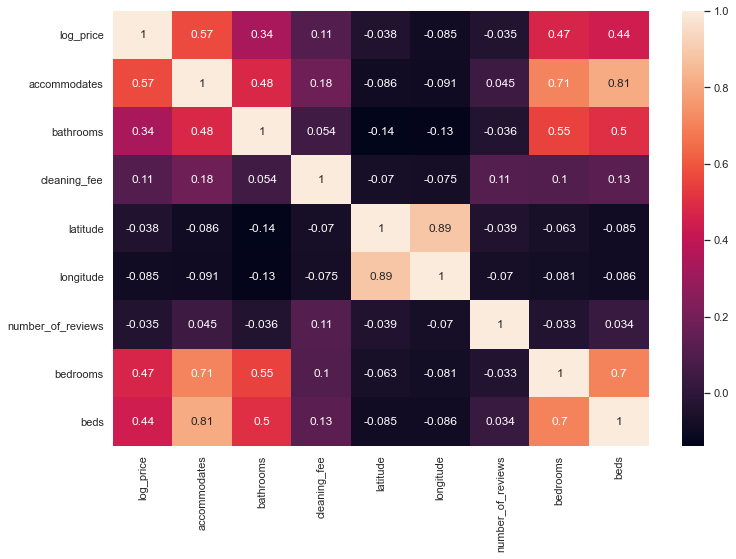

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(),annot=True)

In [23]:
df.groupby(['city','property_type'])[['log_price']].count().sort_values('log_price',ascending=True)

log_price
city    property_type                
DC      Serviced apartment          1
Chicago Vacation home               1
SF      Tent                        1
Chicago Villa                       1
DC      Cabin                       1
...                               ...
NYC     House                    2668
SF      Apartment                3513
LA      House                    6654
        Apartment                7695
NYC     Apartment               27330

[135 rows x 1 columns]

In [24]:
high_price = df.groupby(['city','neighbourhood'])[['log_price']].count()
high_price

log_price
city   neighbourhood                   
Boston Allston-Brighton             414
       Back Bay                     291
       Beacon Hill                  203
       Brookline                      2
       Cambridge                      2
...                                 ...
SF     Twin Peaks                    76
       Union Square                  35
       Visitacion Valley             37
       West Portal                   11
       Western Addition/NOPA        396

[643 rows x 1 columns]

In [25]:
clean_value = df.cleaning_fee.value_counts()
clean_value

True     49178
False    17740
Name: cleaning_fee, dtype: int64

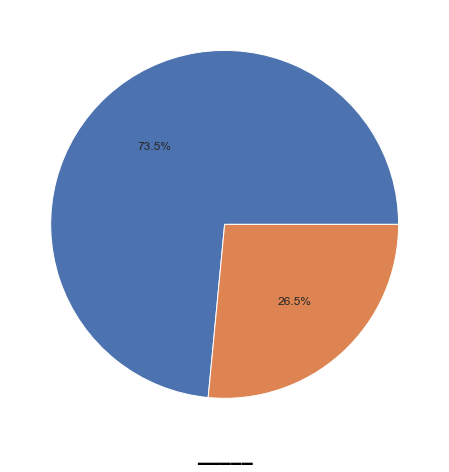

In [26]:
clean_value = df.cleaning_fee.value_counts()
explode = [0.1,0]
plt.pie(clean_value,autopct='%1.1f%%');
plt.xlabel('_____',fontsize = 20, weight = 'bold',color='black');

<AxesSubplot:>

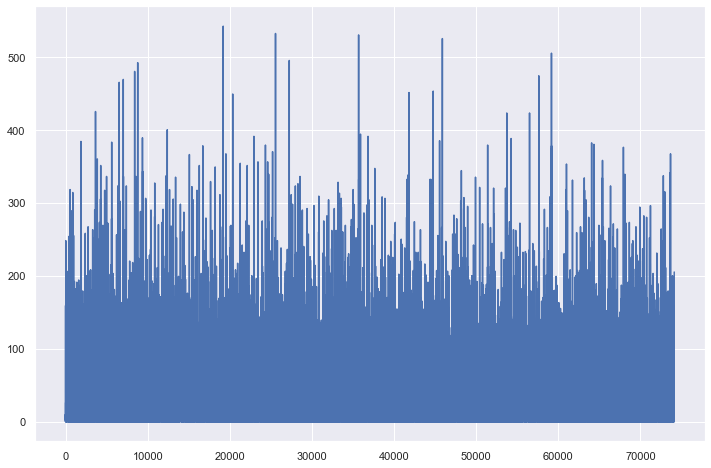

In [27]:
df.number_of_reviews.plot()

<AxesSubplot:>

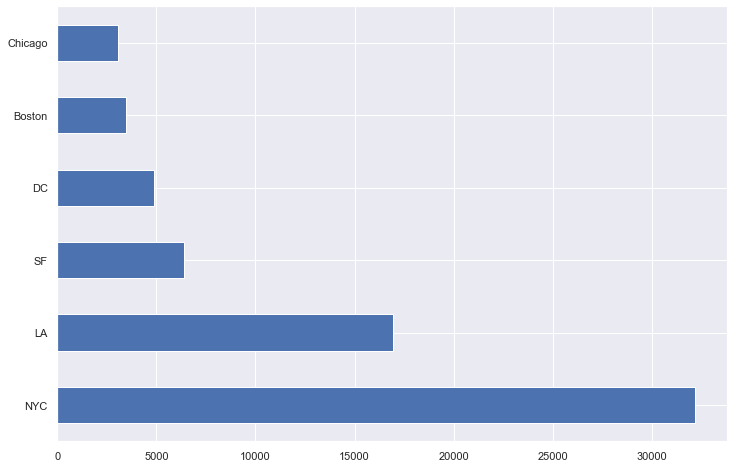

In [28]:
df.city.value_counts().plot(kind='barh')

In [29]:
df.property_type.value_counts().head(5)

Apartment      45571
House          13756
Condominium     2392
Townhouse       1489
Loft            1148
Name: property_type, dtype: int64

<AxesSubplot:xlabel='accommodates'>

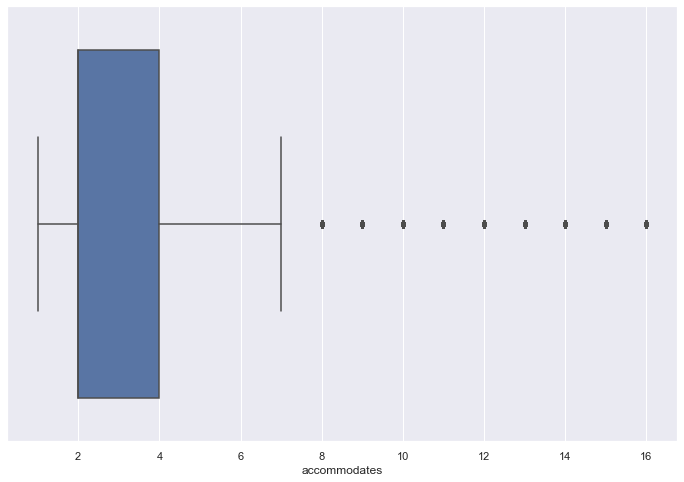

In [30]:
sns.boxplot(x=df['accommodates'])

In [31]:
df[df['accommodates'] > 7].count()

log_price                 3135
property_type             3135
room_type                 3135
amenities                 3135
accommodates              3135
bathrooms                 3135
bed_type                  3135
cancellation_policy       3135
cleaning_fee              3135
city                      3135
host_has_profile_pic      3135
host_identity_verified    3135
host_since                3135
latitude                  3135
longitude                 3135
neighbourhood             3135
number_of_reviews         3135
review_scores_rating      3135
bedrooms                  3135
beds                      3135
dtype: int64

In [32]:
df['accommodates'].values[df['accommodates'] > 7] = 7

log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74103   5.135798     Apartment  Entire home/apt   
74106   4.605170     Apartment     Private room   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74103  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
74106                                                 {}             1   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  \
0              1  Real Bed              strict          True  NYC   
1              1  Real Bed              strict          True  NYC   
2              1  Real Bed            moderate          True  NYC   
3              1  Real Bed            flexible          True   SF   
4              1  Real Bed            moderate          True   DC   
...          ...       ...                 ...           ...  ...   
74103          1  Real Bed            moderate          True   SF   
74106          1  Real Bed            flexible         False  NYC   
74108          1  Real Bed            moderate          True  NYC   
74109          1  Real Bed              strict          True  NYC   
74110          1  Real Bed            moderate         False   LA   

      host_has_profile_pic host_identity_verified  host_since   latitude  \
0                        t                      t  2012-03-26  40.696524   
1                        t                      f  2017-06-19  40.766115   
2                        t                      t  2016-10-25  40.808110   
3                        t                      t  2015-04-19  37.772004   
4                        t                      t  2015-03-01  38.925627   
...                    ...                    ...         ...        ...   
74103                    t                      f  2011-09-26  37.789989   
74106                    t                      t  2013-03-24  40.709025   
74108                    t                      t  2012-01-05  40.706749   
74109                    t                      f  2017-09-17  40.738535   
74110                    t                      t  2012-11-26  33.761096   

        longitude     neighbourhood  number_of_reviews review_scores_rating  \
0      -73.991617  Brooklyn Heights                  2                 100%   
1      -73.989040    Hell's Kitchen                  6                  93%   
2      -73.943756            Harlem                 10                  92%   
3     -122.431619      Lower Haight                  0                  94%   
4      -77.034596  Columbia Heights                  4                  40%   
...           ...               ...                ...                  ...   
74103 -122.407384      Union Square                 24                  98%   
74106  -73.939405      Williamsburg                  0                  94%   
74108  -73.942377      Williamsburg                 

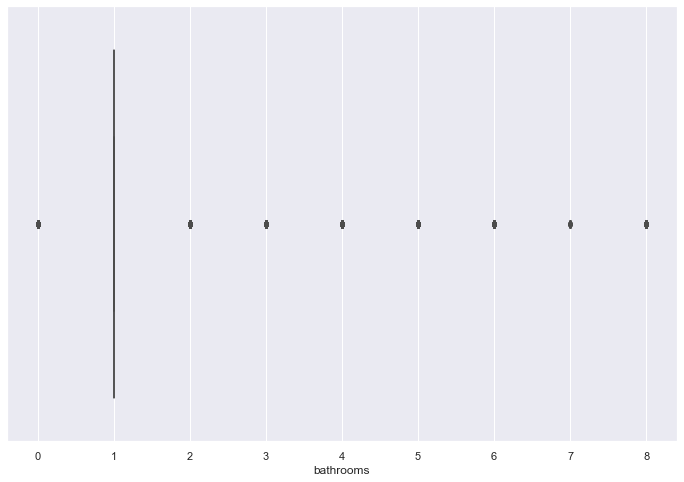

In [33]:
sns.boxplot(x=df['bathrooms'])
mask = df.bathrooms == 1
df[mask]

<AxesSubplot:xlabel='bedrooms'>

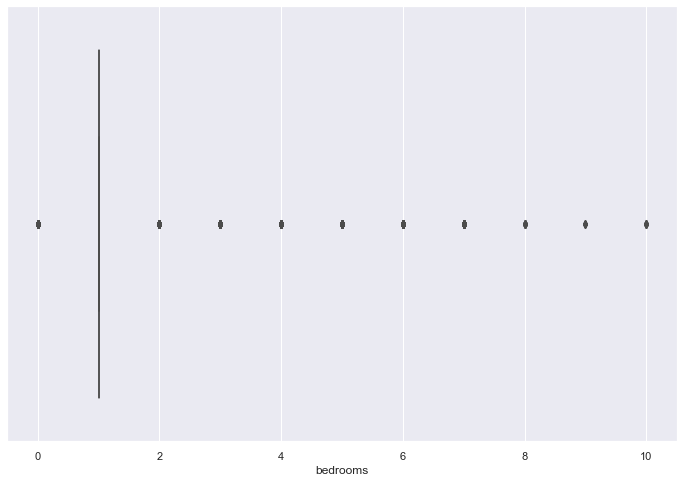

In [34]:
sns.boxplot(x=df['bedrooms'])

<AxesSubplot:xlabel='beds'>

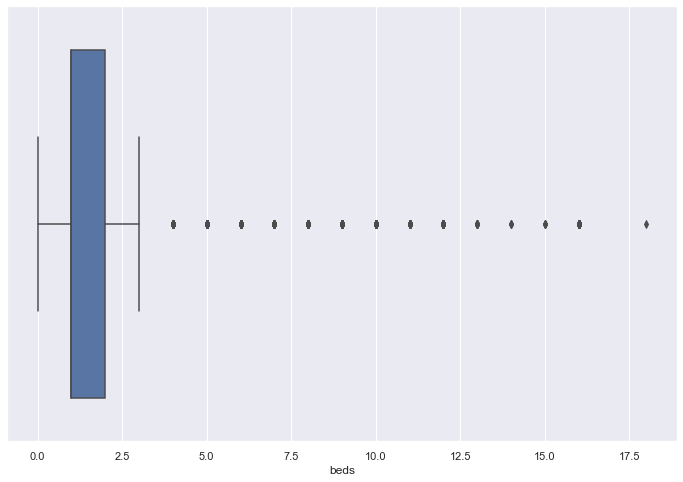

In [35]:
sns.boxplot(x=df['beds'])

In [36]:
df[df['beds'] > 3].count()

log_price                 5035
property_type             5035
room_type                 5035
amenities                 5035
accommodates              5035
bathrooms                 5035
bed_type                  5035
cancellation_policy       5035
cleaning_fee              5035
city                      5035
host_has_profile_pic      5035
host_identity_verified    5035
host_since                5035
latitude                  5035
longitude                 5035
neighbourhood             5035
number_of_reviews         5035
review_scores_rating      5035
bedrooms                  5035
beds                      5035
dtype: int64

In [37]:
df['beds'].values[df['beds'] > 3] = 3

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


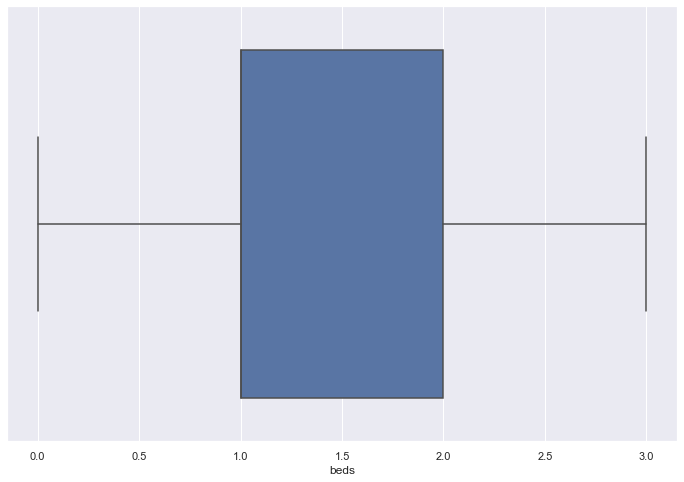

In [38]:
sns.boxplot(df['beds'])
plt.show()

<AxesSubplot:xlabel='log_price'>

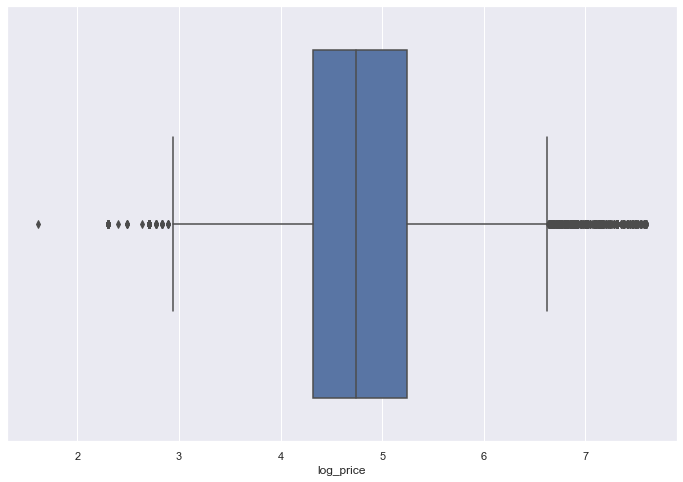

In [39]:
sns.boxplot(x=df['log_price'])

In [40]:
df[df['log_price'] < 3.1].count()

log_price                 200
property_type             200
room_type                 200
amenities                 200
accommodates              200
bathrooms                 200
bed_type                  200
cancellation_policy       200
cleaning_fee              200
city                      200
host_has_profile_pic      200
host_identity_verified    200
host_since                200
latitude                  200
longitude                 200
neighbourhood             200
number_of_reviews         200
review_scores_rating      200
bedrooms                  200
beds                      200
dtype: int64

In [41]:
df[df['log_price'] > 6.5].count()

log_price                 1430
property_type             1430
room_type                 1430
amenities                 1430
accommodates              1430
bathrooms                 1430
bed_type                  1430
cancellation_policy       1430
cleaning_fee              1430
city                      1430
host_has_profile_pic      1430
host_identity_verified    1430
host_since                1430
latitude                  1430
longitude                 1430
neighbourhood             1430
number_of_reviews         1430
review_scores_rating      1430
bedrooms                  1430
beds                      1430
dtype: int64

In [42]:
df['log_price'].values[df['log_price'] < 3.1] = 3.1

In [43]:
df['log_price'].values[df['log_price'] > 6.5] = 6.5

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


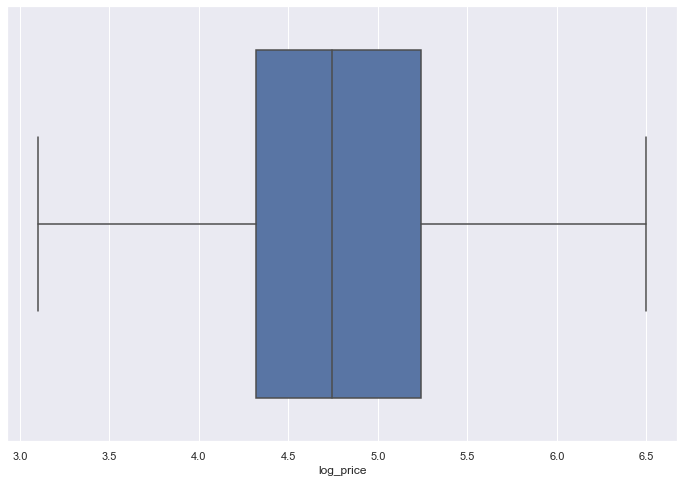

In [44]:
sns.boxplot(df['log_price'])
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


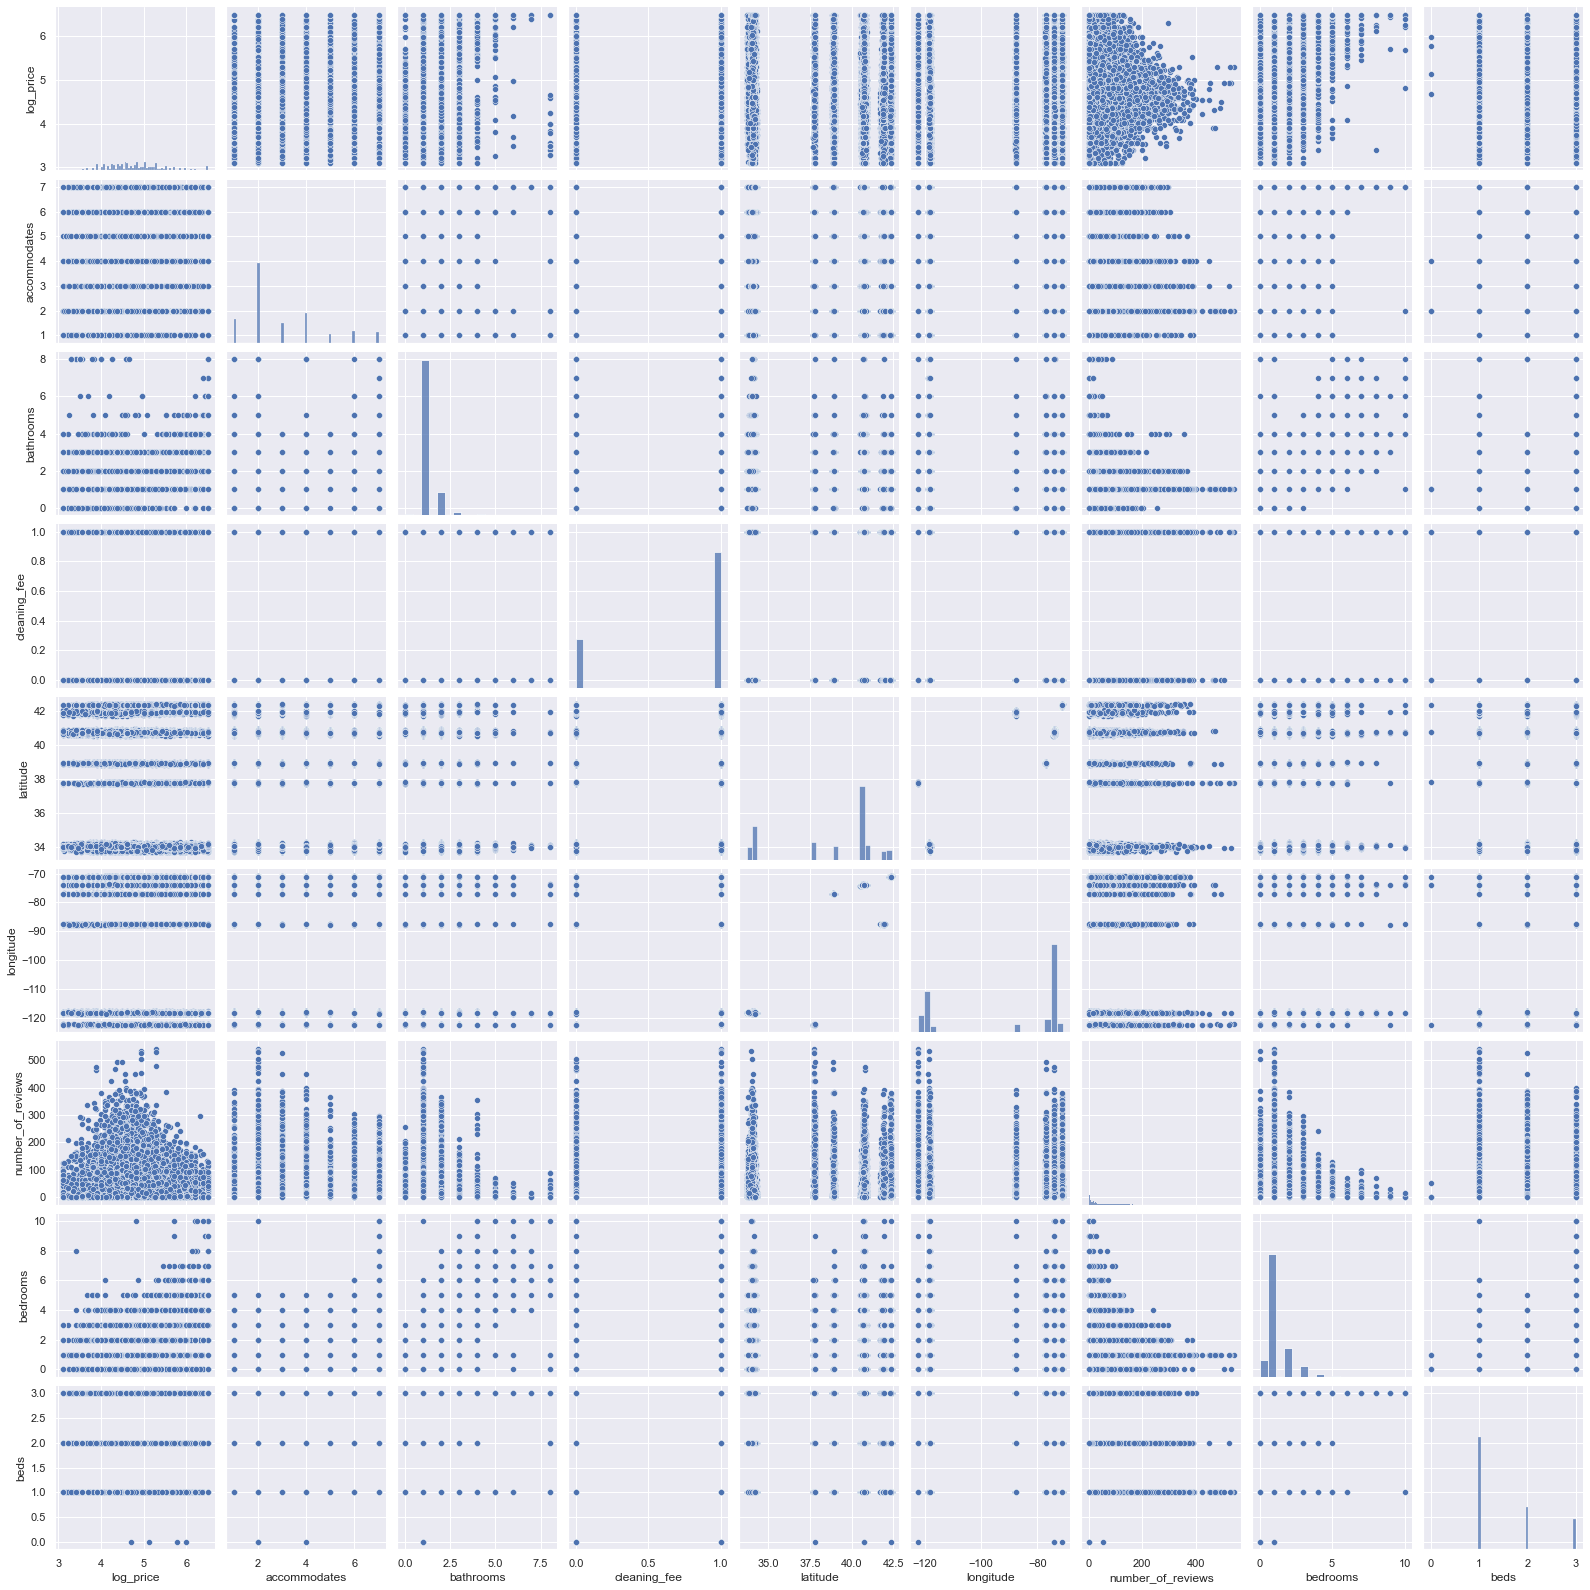

In [45]:
sns.pairplot(df)

In [46]:
X = pd.get_dummies(df, columns = ['neighbourhood','property_type','room_type'])
X

log_price                                          amenities  \
0       5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3       6.500000  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...          ...                                                ...   
74106   4.605170                                                 {}   
74107   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0                 3          1  Real Bed              strict          True   
1                 7          1  Real Bed              strict          True   
2                 5          1  Real Bed            moderate          True   
3                 4          1  Real Bed            flexible          True   
4                 2          1  Real Bed            moderate          True   
...             ...        ...       ...                 ...           ...   
74106             1          1  Real Bed            flexible         False   
74107             4          2  Real Bed            moderate          True   
74108             5          1  Real Bed            moderate          True   
74109             2          1  Real Bed              strict          True   
74110             4          1  Real Bed            moderate         False   

      city host_has_profile_pic host_identity_verified  ...  \
0      NYC                    t                      t  ...   
1      NYC                    t                      f  ...   
2      NYC                    t                      t  ...   
3       SF                    t                      t  ...   
4       DC                    t                      t  ...   
...    ...                  ...                    ...  ...   
74106  NYC                    t                      t  ...   
74107   LA                    t                      f  ...   
74108  NYC                    t                      t  ...   
74109  NYC                    t                      f  ...   
74110   LA                    t                      t  ...   

      property_type_Tipi  property_type_Townhouse  property_type_Train  \
0                      0                        0                    0   
1                      0                        0                    0   
2                      0                        0                    0   
3                      0                        0                    0   
4                      0                        0                    0   
...                  ...                      ...                  ...   
74106                  0                        0                    0   
74107                  0                        0                    0   
74108                  0                        0                    0   
74109                  0                        0                    0   
74110                  0                        0                    0   

       property_type_Treehouse property_type_Vacation home  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
74106                        0                           0   
74107                        0                           0   
74108        

In [47]:
X.drop(['bedrooms','bathrooms', 'amenities', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified',
              'host_since', 'latitude', 'longitude', 'review_scores_rating', 'log_price', 'number_of_reviews'], axis=1, inplace=True)

In [48]:
Y = df['log_price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53534, 656)
(13384, 656)
(53534,)
(13384,)


In [50]:
X.dtypes
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_since                0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [51]:
len(X)

66918

In [52]:
X.dropna()

accommodates  beds  neighbourhood_16th Street Heights  \
0                 3     1                                  0   
1                 7     3                                  0   
2                 5     3                                  0   
3                 4     2                                  0   
4                 2     1                                  0   
...             ...   ...                                ...   
74106             1     1                                  0   
74107             4     3                                  0   
74108             5     2                                  0   
74109             2     2                                  0   
74110             4     2                                  0   

       neighbourhood_Adams Morgan  neighbourhood_Alamo Square  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
74106                           0                           0   
74107                           0                           0   
74108                           0                           0   
74109                           0                           0   
74110                           0                           0   

       neighbourhood_Albany Park  neighbourhood_Alhambra  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
74106                          0                       0   
74107                          0                       0   
74108                          0                       0   
74109                          0                       0   
74110                          0                       0   

       neighbourhood_Allerton  neighbourhood_Allston-Brighton  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
74106                       0                               0   
74107                       0                               0   
74108                       0                               0   
74109                       0                               0   
74110                       0                               0   

       neighbourhood_Alondra Park  ...  property_type_Tipi  \
0                               0  ...                   0   
1                               0  ...                   0   
2                               0  ...                   0   
3                               0  ...                   0   
4                               0  ...                   0   
...                           ...  ...                 ...   
74106                           0  ...                   0   
74107                           0  ...                   0   
74108                           0  ...                   0   
74109                           0  ...                   0   
74110                           0  ...                   0   

       property_type_Townhouse  property_type_Train  property_type_Treehouse  \
0                            0                    0                        0   
1                            0                    

In [53]:
len(X)

66918

In [54]:
np.any(np.isnan(X))
np.all(np.isfinite(X))

True

In [55]:
# Fit a linear regression model on the train data set
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
# Check the R-squared value of the model on the training data
model.score(X_train,y_train)

0.6423384947002663

In [57]:
predictions_train = model.predict(X_train)
predictions_train.shape

(53534,)

In [58]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_train, predictions_train))

0.40936731246609764

In [59]:
# Compare the actual y values in the test set with the predicted values
predictions_test = model.predict(X_test)
predictions_test.shape

(13384,)

In [60]:
sqrt(mean_squared_error(y_test, predictions_test))

0.40900578353868

In [61]:
import plotly.express as px
def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = df[df['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('NYC')

In [62]:
create_map('LA')